<a href="https://colab.research.google.com/github/hyesungKomet/deep_learning/blob/main/ch_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -O https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3655  100  3655    0     0  19650      0 --:--:-- --:--:-- --:--:-- 19650


In [ ]:
import sys, os
import pickle
import numpy as np
from mnist import load_mnist
import matplotlib.pyplot as plt
sys.path.append(os.pardir)

[0.26894142 0.73105858 0.88079708]


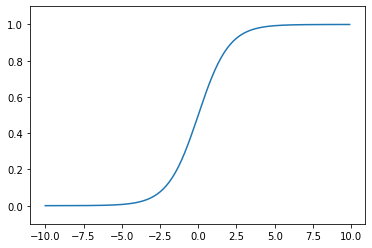

In [ ]:
# 시그모이드 함수 정의하기
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

# 시그모이드 함수 그리기
x = np.arange(-10,10,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
# 소프트맥스 함수 정의하기
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y
#오버플로우 해결 방안
def softmax(x):
  c = np.max(x)
  exp_x = np.exp(x - c)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y

In [ ]:
# mnist.py에 있는 load_mnist() 함수를 사용해 변수에 저장
# 궁금하다면 matplotlib의 pyplot을 이용하여 그림 출력해보기
from PIL import Image
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

img = img.reshape(28,28)
img_show(img)


5


https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl

View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기

In [ ]:
# network라는 변수에 pkl파일을 rb모드로 읽은 값 저장
# pickle.load()함수 사용
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

# sample_weight.pkl에는 학습된 가중치들이 담겨있음
def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

In [ ]:
# 예측 함수 정의하기
def predict(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  
  
 
  # x_train에 있는 값에 대해서는 W1과 b1로 가중치 연산
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  # 의 결과값에 (1)를 적용한 후 W2와 b2로 가중치 연산
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  # 의 결과값에 (1)를 적용한 후 W3과 b3으로 가중치 연산
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  # 의 결과값을 (2)를 적용한 후, 가장 큰 확률을 가진 친구를 답으로 삼음
  return y
# (1) : _____ 함수
# (2) : _____ 함수

In [ ]:
# 돌려보고 Accuracy 확인
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) #-확률최고인 원소의 인덱스 얻음
  if(p==t[i]):
    accuracy_cnt += 1

print("Accuracy: {}".format(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


## 추가 과제
1. Sigmoid 함수 대신 Relu를 사용하고 Accuracy 값 비교하기
2. Sigmoid 함수, Relu 함수를 사용하기에 적합한 상황이 무엇인지 조사하고, 위의 결과가 나온 이유 설명하기 

In [ ]:
# Relu 함수 정의하기
def relu(x):
  return np.maximum(0, x)

In [ ]:
# 예측 함수 정의하고 
# Accuracy 확인하기
def predict_relu(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  
  
 
  # x_train에 있는 값에 대해서는 W1과 b1로 가중치 연산
  a1 = np.dot(x, W1) + b1
  z1 = relu(a1)
  # 의 결과값에 (1)를 적용한 후 W2와 b2로 가중치 연산
  a2 = np.dot(z1, W2) + b2
  z2 = relu(a2)
  # 의 결과값에 (1)를 적용한 후 W3과 b3으로 가중치 연산
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  # 의 결과값을 (2)를 적용한 후, 가장 큰 확률을 가진 친구를 답으로 삼음
  return y

In [ ]:
# 돌려보고 Accuracy 확인
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict_relu(network, x[i])
  p = np.argmax(y) #-확률최고인 원소의 인덱스 얻음
  if(p==t[i]):
    accuracy_cnt += 1

print("Accuracy: {}".format(float(accuracy_cnt)/len(x)))

Accuracy: 0.8415


sigmoid 함수를 활성화 함수로 사용했을 때는 약 93.5%의 정확도를 보였고, relu함수를 사용했을 때는 약 84%의 정확도를 보여서 sigmoid가 더 높은 성능을 보였다.
시그모이드의 경우 x의 절댓값이 클수록 활성화 함수에서 변화가 미미해진다는 단점이 있지만 이진 분류에 뛰어난 성능을 보인다. 렐루의 경우 0보다 작은 값은 늘 0이 나오도록 하기에 학습이 빠르고 연산이 적지만 그만큼 정확도는 떨어질 것이다.

## 추가 과제 2

1. batch처리를 한다
2. batch_size가 달라질 때마다 함수 실행 시간이 얼마나 달라지는지 측정하고 결과를 표로 표시한다
* 예시
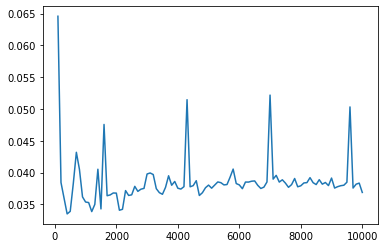

In [ ]:
import time

# 실행시간 측정하기

In [ ]:
from matplotlib import pyplot as plt

# 도표 그리기